# Import libraries & dependencies.

In [10]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import ipywidgets as widgets

# Load the data & remove rows with missing values

In [11]:
penguins_data = pd.read_csv("penguins_size.csv")
penguins_data['sex'] = penguins_data['sex'].replace('.', pd.NA)
penguins_data.dropna(inplace=True)

# Pie chart of species distribution

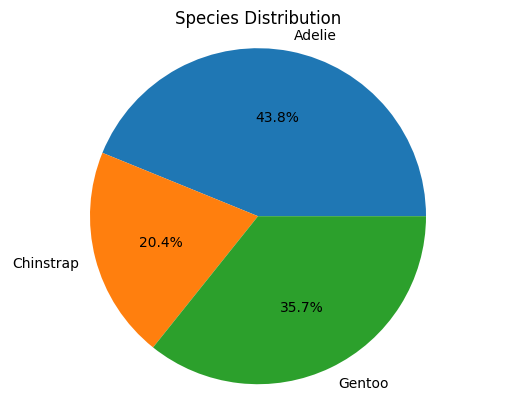

In [12]:
penguins_data.groupby("species").size().plot(kind="pie", autopct="%1.1f%%")
pyplot.title('Species Distribution')
pyplot.axis('equal')
pyplot.show()

# Count plot of species on each island

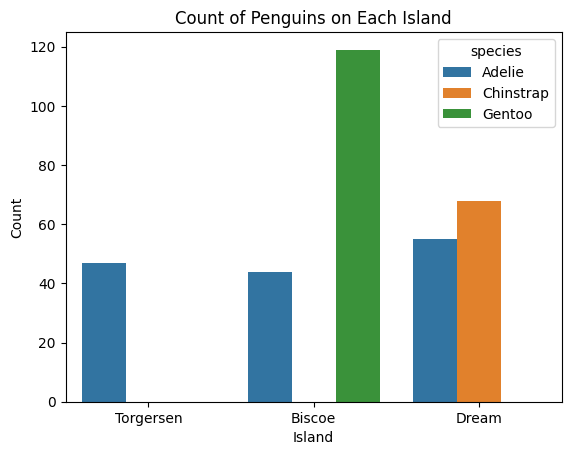

In [13]:
sns.countplot(x='island', data=penguins_data, hue='species')
pyplot.title('Count of Penguins on Each Island')
pyplot.xlabel('Island')
pyplot.ylabel('Count')
pyplot.show()

# Pairplot for penguin data

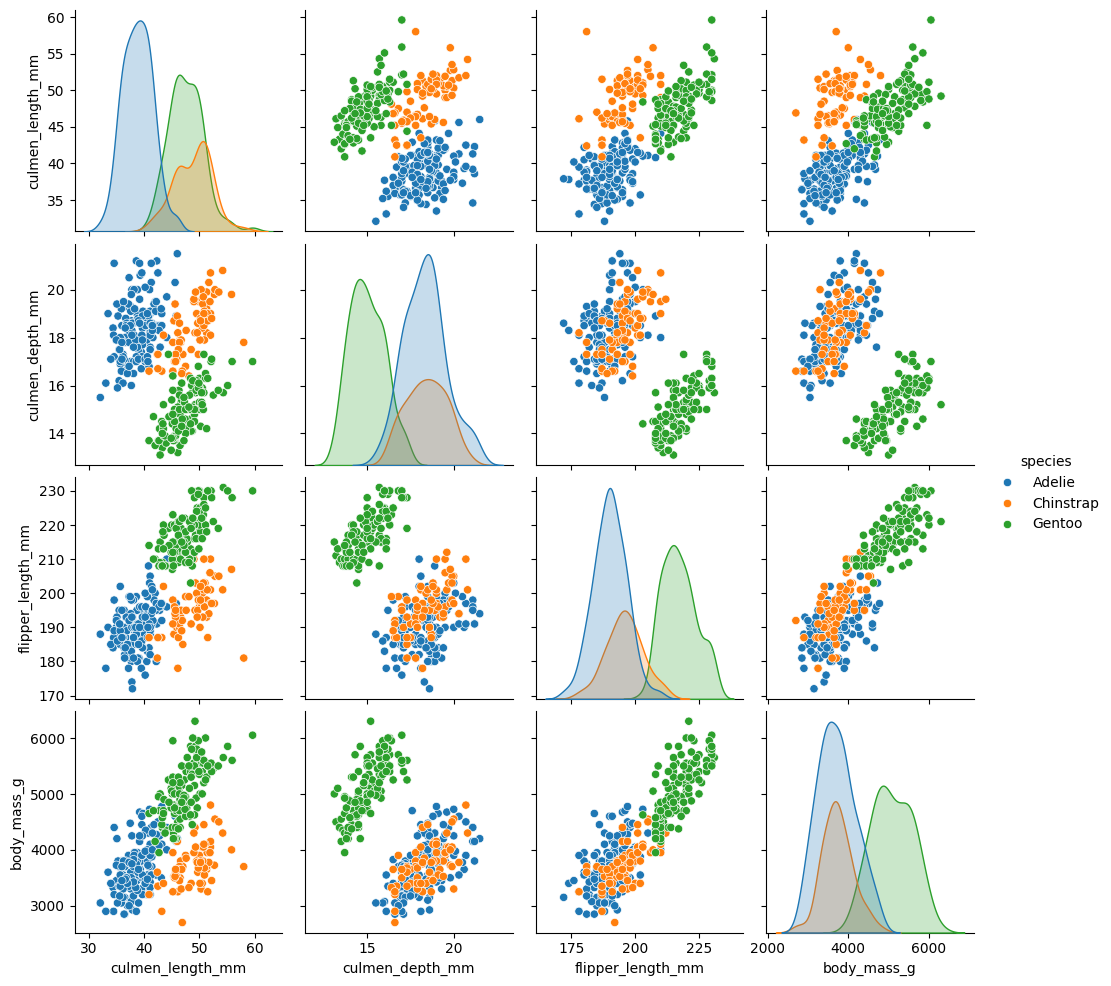

In [14]:
sns.pairplot(penguins_data, hue='species')
pyplot.show()

# Train the model & calculate accuracy score

In [15]:
# Encode categorical variables
label_encoder = LabelEncoder()
penguins_data['sex'] = label_encoder.fit_transform(penguins_data['sex'])
penguins_data['island'] = label_encoder.fit_transform(penguins_data['island'])

# Initialize independent and dependent variables
X = penguins_data.drop('species', axis=1)
y = penguins_data['species']

# Split the data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 57)

# Initialize the model
log_reg_model = LogisticRegression(max_iter=10000, random_state = 57)

# Train the model
log_reg_model.fit(X_train.values, y_train)

# Apply the predictions
y_pred = log_reg_model.predict(X_test.values)

# Calculate & Display Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the logistic regression model:", accuracy)

Accuracy of the logistic regression model: 0.9850746268656716


# Confusion matrix

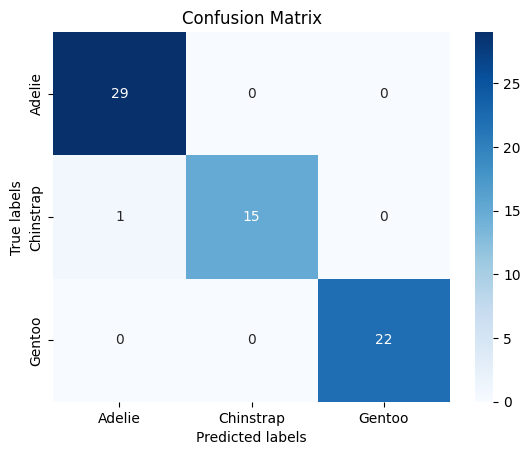

In [16]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Adelie', 'Chinstrap', 'Gentoo'], 
            yticklabels=['Adelie', 'Chinstrap', 'Gentoo'])
pyplot.xlabel('Predicted labels')
pyplot.ylabel('True labels')
pyplot.title('Confusion Matrix')
pyplot.show()

# Function for user to predict penguin species using the model

In [17]:
def predict_penguin_species(b):
    with output:
        output.clear_output()
        sex_encoded = 0 if sex.value.lower() == 'male' else 1
        island_encoded = {'biscoe': 0, 'dream': 1, 'torgersen': 2}.get(island.value.lower(), -1)
        input_data = [[island_encoded, culmen_length_mm.value, culmen_depth_mm.value, flipper_length_mm.value, body_mass_g.value, sex_encoded]]
        prediction = log_reg_model.predict(input_data)
        print("Predicted Species:", prediction)


# User interface for predicting penguin species. Initialize variables using the widgets and then press 'Predict'

In [18]:
# Initialize widgets
culmen_length_mm = widgets.FloatSlider(min=30, max=60, step=0.1, description='Culmen Length (mm):', value=40)
culmen_depth_mm = widgets.FloatSlider(min=13, max=22, step=0.1, description='Culmen Depth (mm):', value=18)
flipper_length_mm = widgets.FloatSlider(min=170, max=230, step=1, description='Flipper Length (mm):', value=200)
body_mass_g = widgets.FloatSlider(min=2700, max=6300, step=10, description='Body Mass (g):', value=4000)
sex = widgets.Dropdown(options=['Male', 'Female'], description='Sex:', value='Male')
island = widgets.Dropdown(options=['Biscoe', 'Dream', 'Torgersen'], description='Island:', value='Biscoe')
predict_button = widgets.Button(description='Predict')
output = widgets.Output()

# Bind prediction function to the button
predict_button.on_click(predict_penguin_species)

# Display widgets
widgets.VBox([culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g, sex, island, predict_button, output])